### introduction:
The objective of the airplane price prediction dataset is to analyze and predict the cost of flight tickets based on a variety of features, such as Travel duration, Number of Stopovers, Flight classes etc...

This dataset is from kaggle.It consist of flights between India's top 6 metro areas. The cleaned dataset contains 11 characteristics and 300261 datapoints. The site provided a total of 300261 unique flight booking possibilities. 50 days of data were gathered, from February 11 to March 31 of 2022.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings  # For controlling and filtering warnings

from sklearn.preprocessing import MinMaxScaler  # For scaling feature values to a specific range (0-1)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics                      # For model evaluation metrics (e.g., R^2, MSE)
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data 

In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature


In [42]:
data = pd.read_csv('Clean_Dataset.csv')
data.head(20)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
data.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
data.drop(columns='Unnamed: 0', inplace=True)  # removes the unnecessary column.

In [7]:
data.rename(columns={'class': 'flight_class'}, inplace=True)

In [8]:
for index, value in enumerate(data.columns) :
    print(index, ":", value)

0 : airline
1 : flight
2 : source_city
3 : departure_time
4 : stops
5 : arrival_time
6 : destination_city
7 : flight_class
8 : duration
9 : days_left
10 : price


In [9]:
data.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

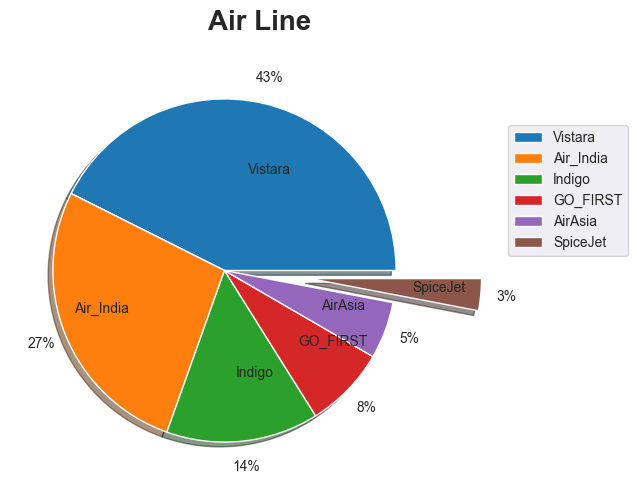

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Air Line', fontsize=20, fontweight='bold')

# Pie chart
labels = data.airline.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.5)
ax.pie(data.airline.value_counts(), 
       autopct='%.f%%', 
       labels=labels, 
       shadow=True, 
       pctdistance=1.15, 
       labeldistance=0.6, 
       explode=explode)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Display the plot
plt.tight_layout()
plt.show()



In [11]:
data.drop(columns='flight', inplace=True)

In [12]:
data.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

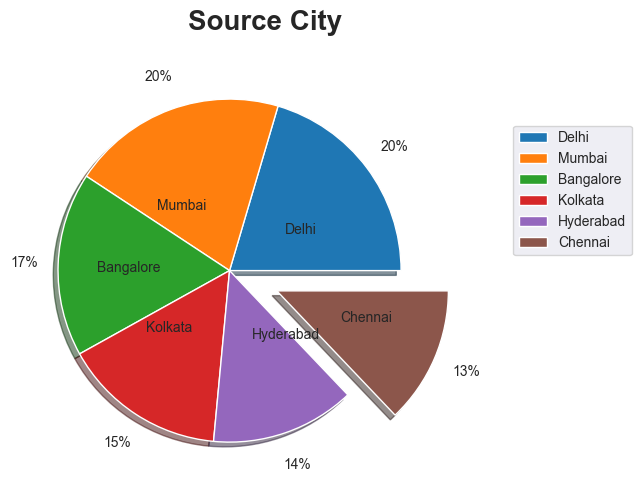

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Source City', fontsize=20, fontweight='bold')

# Pie chart
labels = data.source_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax.pie(data.source_city.value_counts(), 
       autopct='%.f%%', 
       labels=labels, 
       shadow=True, 
       pctdistance=1.2, 
       labeldistance=0.4, 
       explode=explode)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# Display the plot
plt.tight_layout()
plt.show()



In [14]:
data.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

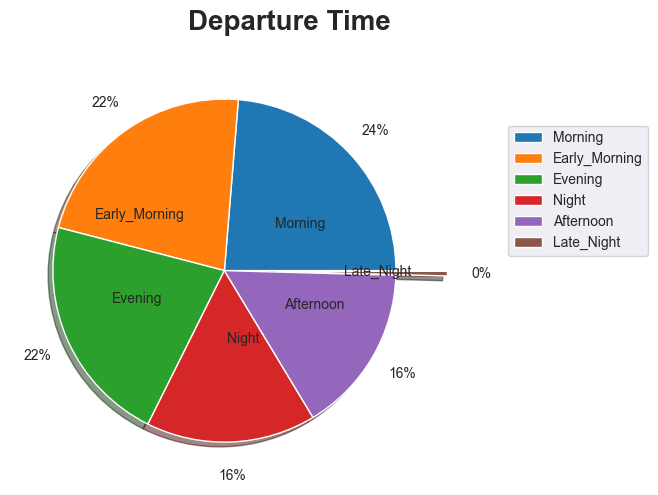

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle('Departure Time', fontsize=20, fontweight='bold')

labels = data.departure_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax.pie(data.departure_time.value_counts(), 
       autopct='%.f%%', 
       labels=labels, 
       shadow=True, 
       pctdistance=1.2, 
       labeldistance=0.4, 
       explode=explode)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

plt.tight_layout()
plt.show()


In [16]:
data.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

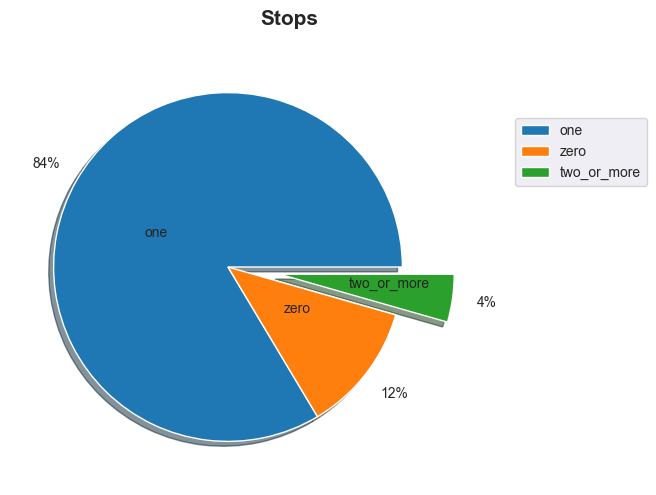

In [17]:
fig, ax = plt.subplots(figsize=(7,5))
fig.suptitle('Stops', fontsize=15, fontweight='bold')

labels = data.stops.value_counts().index.tolist()
explode = (0, 0, 0.3)
ax.pie(data.stops.value_counts(), 
       autopct='%.f%%', 
       labels=labels, 
       shadow=True, 
       pctdistance=1.2, 
       labeldistance=0.4, 
       explode=explode)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

plt.tight_layout()
plt.show()


In [18]:
data.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

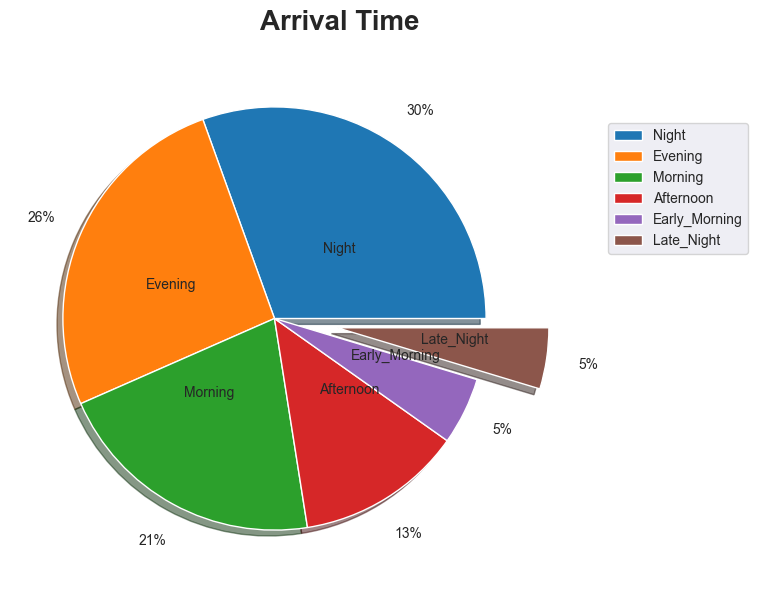

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('Arrival Time', fontsize=20, fontweight='bold')

labels = data.arrival_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax.pie(data.arrival_time.value_counts(), 
       autopct='%.f%%', 
       labels=labels, 
       shadow=True, 
       pctdistance=1.2, 
       labeldistance=0.4, 
       explode=explode)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

plt.tight_layout()
plt.show()


In [20]:
data.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

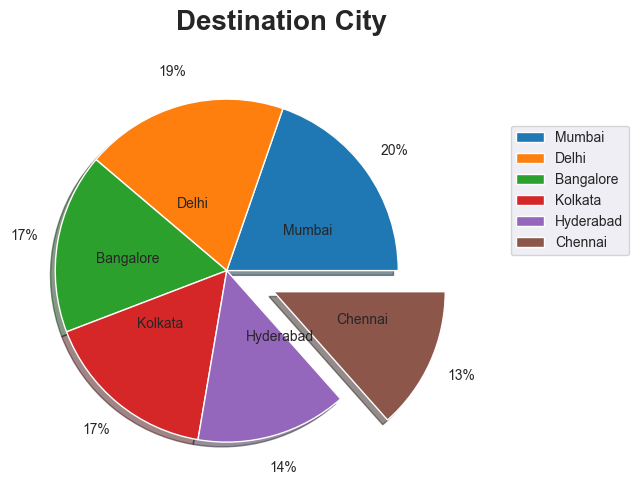

In [21]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle('Destination City', fontsize=20, fontweight='bold')

labels = data.destination_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax.pie(data.destination_city.value_counts(), 
       autopct='%.f%%', 
       labels=labels, 
       shadow=True, 
       pctdistance=1.2, 
       labeldistance=0.4, 
       explode=explode)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

plt.tight_layout()
plt.show()


In [22]:
data.flight_class.value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

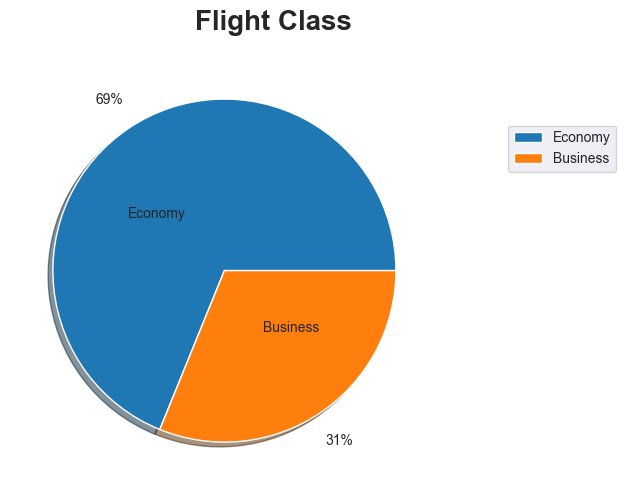

In [23]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle('Flight Class', fontsize=20, fontweight='bold')
labels = data.flight_class.value_counts().index.tolist()
ax.pie(data.flight_class.value_counts(), 
       autopct='%.f%%', 
       labels=labels, 
       shadow=True, 
       pctdistance=1.2, 
       labeldistance=0.4)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

plt.tight_layout()
plt.show()


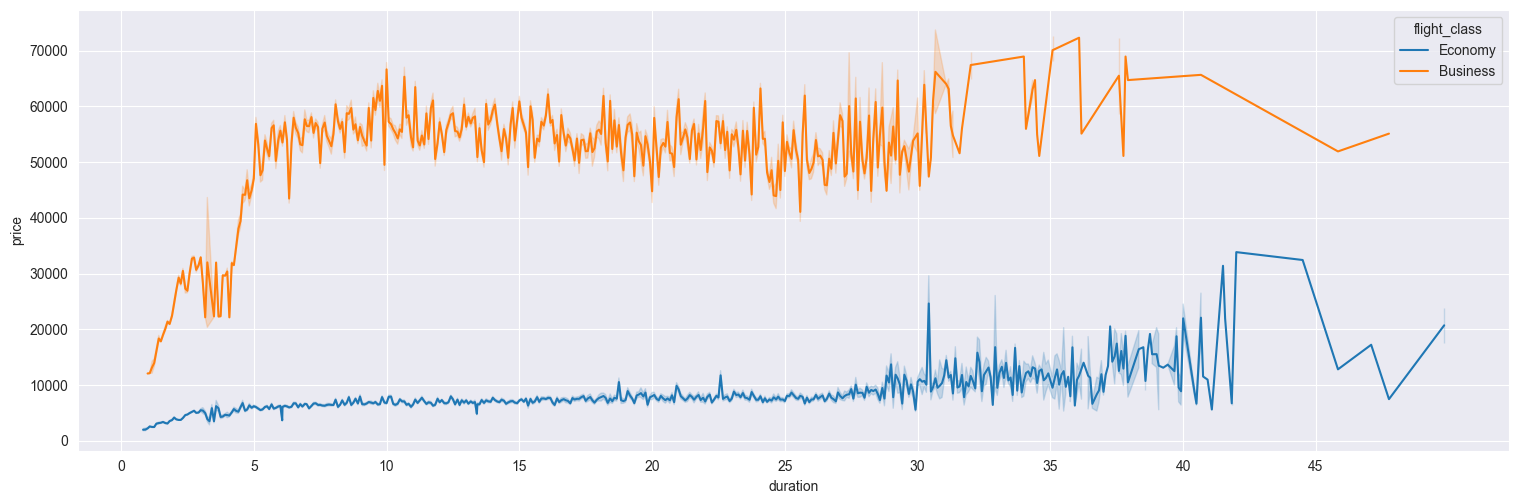

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.tight_layout()

sns.lineplot(x='duration', y='price', data=data, ax=ax, hue='flight_class').set_xticks(np.arange(0, 50, 5))
plt.show()

#In Business class, from 1 to 5 hours, price growth sharply.
#In Economy class growth of price have a linear growth

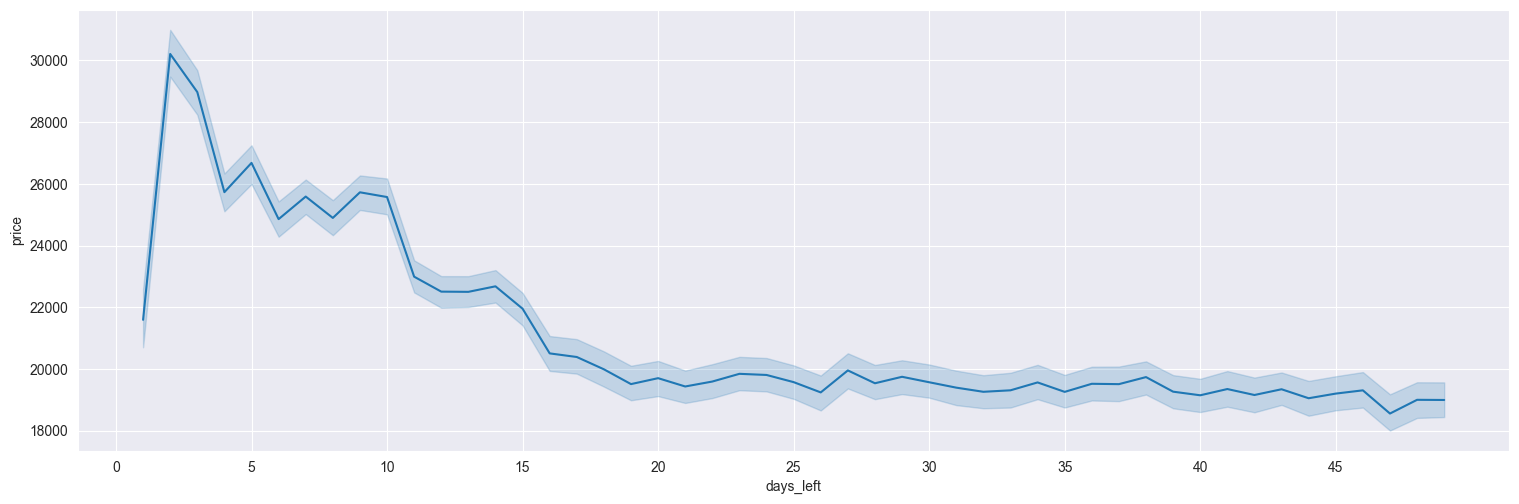

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.tight_layout()

sns.lineplot(x='days_left', y='price', data=data, ax=ax).set_xticks(np.arange(0, 50, 5))
plt.show()

#The earlier you book your ticket, the less you will pay.


In [26]:
#Replace string values with integer
# col : airline
data.airline = data.airline.replace(
    {
        'Vistara' : 1,
        'Air_India' : 2,
        'Indigo' : 3,
        'GO_FIRST' : 4,
        'AirAsia': 5,
        'SpiceJet' : 6  
    }
)

In [27]:
# col : source_city
data.source_city = data.source_city.replace(
    {
        'Delhi' : 1,
        'Mumbai' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad'  : 5,
        'Chennai' : 6
    }
)

In [28]:
# col : departure_time
data.departure_time = data.departure_time.replace(
    {
        'Morning' : 1,
        'Early_Morning' : 2, 
        'Evening' : 3,
        'Night' : 4,
        'Afternoon' : 5, 
        'Late_Night' : 6
    }
)

In [29]:
# col : stops
data.stops = data.stops.replace(
    {
        'one' : 1,
        'zero' : 2,
        'two_or_more' : 3
    }
)

In [30]:
# col : arrival_time
data.arrival_time = data.arrival_time.replace(
    {
        'Night' : 1,
        'Evening' : 2,
        'Morning' : 3,
        'Afternoon' : 4,
        'Early_Morning' : 5,
        'Late_Night' : 6
    }
)

In [31]:
# col : destination_city
data.destination_city = data.destination_city.replace(
    {
        'Mumbai' : 1,
        'Delhi' : 2,
        'Bangalore' : 3,
        'Kolkata' : 4,
        'Hyderabad' : 5,
        'Chennai' : 6
    }
)

In [32]:
# col : flight_class
data.flight_class = data.flight_class.replace(
    {
        'Economy' : 1,
        'Business' :2
    }
)

In [33]:
data.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,2.153072,3.201487,2.794901,1.208480,2.498846,3.268316,1.311464,12.221021,26.004751,20889.660523
std,1.348357,1.684757,1.401659,0.503533,1.407841,1.688644,0.463093,7.191997,13.561004,22697.767366
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,1.000000,1105.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.830000,15.000000,4783.000000
50%,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,3.000000,5.000000,4.000000,1.000000,3.000000,5.000000,2.000000,16.170000,38.000000,42521.000000
max,6.000000,6.000000,6.000000,3.000000,6.000000,6.000000,2.000000,49.830000,49.000000,123071.000000


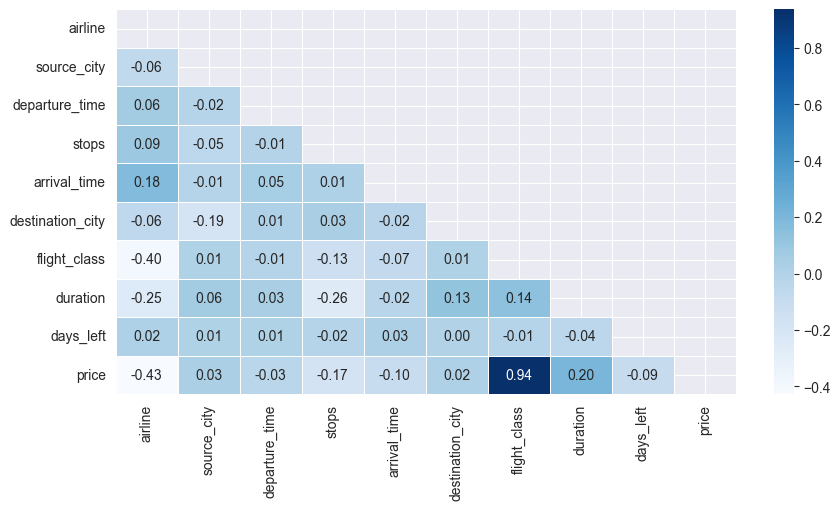

In [34]:
corr = data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

#Flight classes is most relevant feature to Price.

In [35]:
X_temp = data.drop(columns='price')  # Drops the 'price' column from the dataset and stores the remaining data (features) in X_temp.
y = data.price # Stores the 'price' column into y.

In [36]:
#Min-Max Scaling on a dataset to normalize its features to a range of [0, 1].
scaler = MinMaxScaler().fit_transform(X_temp)  #returning a NumPy array with normalized values.
X = pd.DataFrame(scaler, columns=X_temp.columns)
main_X = X.copy()

In [37]:
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)  

,min,mean,std,50%,max
airline,0.000000,0.230614,0.269671,0.200000,1.000000
source_city,0.000000,0.440297,0.336951,0.400000,1.000000
departure_time,0.000000,0.358980,0.280332,0.400000,1.000000
stops,0.000000,0.104240,0.251766,0.000000,1.000000
arrival_time,0.000000,0.299769,0.281568,0.200000,1.000000
destination_city,0.000000,0.453663,0.337729,0.400000,1.000000
flight_class,0.000000,0.311464,0.463093,0.000000,1.000000
duration,0.000000,0.232470,0.146775,0.212653,1.000000
days_left,0.000000,0.520932,0.282521,0.520833,1.000000


Best test_size : 0.15
Best R2Score : 0.896640267752407
Best Mean Squared Error : 52819242.416796684


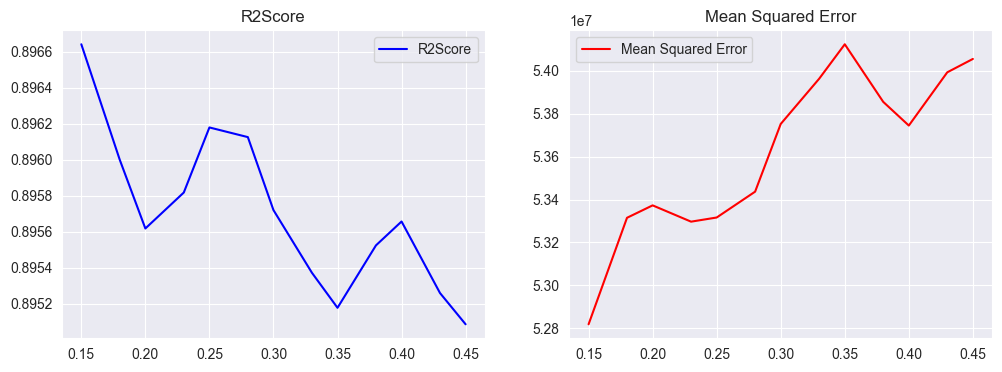

In [38]:
# Create a loop to find best test_size
test_list = []
mse_list = []
r2score_list = []
best_r2=0
best_mse=0
best_test=0

for tester in range(6, 19) :
    tester = round(0.025 * tester, 2)  # Converts range to test_size values (e.g., 0.15, 0.175, ..., 0.45).
    test_list.append(tester)         # Store current test_size in test_list.

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tester, random_state=0)
    
    lr = LinearRegression().fit(X, y)  # Train Linear Regression on training data.
    y_pred_lr = lr.predict(X_test)    # Predict on test data.
    
    r2score = metrics.r2_score(y_test, y_pred_lr)  # Calculate R^2 Score.
    r2score_list.append(r2score)       
    
    mse = metrics.mean_squared_error(y_test, y_pred_lr)  # Calculate MSE.
    mse_list.append(mse)
    #
    if r2score>best_r2 :   # If this R² Score is the best so far
        best_r2 = r2score  # Update the best R^2 Score.
        best_mse = mse      # Update the corresponding MSE.
        best_test = tester    # Update the best test_size.

print(colored('Best test_size : {}'.format(best_test), 'blue'))
print(colored('Best R2Score : {}'.format(best_r2), 'blue'))
print(colored('Best Mean Squared Error : {}'.format(best_mse), 'blue'))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(test_list, r2score_list, c='blue', label='R2Score')
ax[0].set_title("R2Score")
ax[0].legend()

ax[1].plot(test_list, mse_list, c='red', label='Mean Squared Error')
ax[1].set_title("Mean Squared Error")
ax[1].legend()
plt.show()

In [39]:
lr_r2 = best_r2
print(colored('Liear Legresion R2Score = {}'.format(round(lr_r2, 3)), 'green'))

Liear Legresion R2Score = 0.897


In [40]:
X_train, X_test, y_train, y_test = train_test_split(main_X, y, test_size=tester, random_state=0)
                                                           # main_X contains the feature data and y contains the target variable.

rf = RandomForestRegressor(n_estimators=500, max_features=8, n_jobs=-1).fit(X_train, y_train) #the model will use 500 decision trees to make predictions. 
                                                                               #Each tree will consider at most 8 features when making a decision at each split.
y_pred_rf = rf.predict(X_test)
rf_r2 = metrics.r2_score(y_test, y_pred_rf)
print(colored('RandomForestRegressor R2Score = {}'.format(round(rf_r2, 3)), 'green'))

RandomForestRegressor R2Score = 0.985


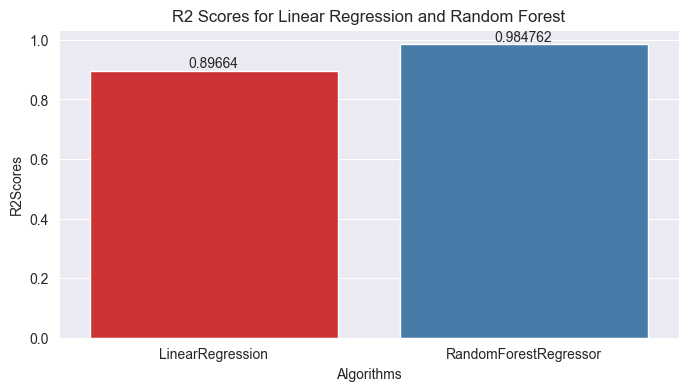

Linear Regression R2 Score: 0.896640267752407
Random Forest R2 Score: 0.9847618570152086


In [41]:
result = pd.DataFrame({
    'Algorithms': ['LinearRegression', 'RandomForestRegressor'],
    'R2Scores': [lr_r2, rf_r2]
})

# Plot the R2 Scores
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Algorithms', y='R2Scores', data=result, palette='Set1')
for container in ax.containers:
    ax.bar_label(container)
plt.title('R2 Scores for Linear Regression and Random Forest')
plt.show()

# Print R2 Scores
print(f'Linear Regression R2 Score: {lr_r2}')
print(f'Random Forest R2 Score: {rf_r2}')